In [1]:
%matplotlib inline


# PCA example with Iris Data-set

Principal Component Analysis applied to the Iris dataset.


*_This example needs a better dataset than Iris._*


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import datasets
import pandas as pd

In [3]:
np.random.seed(5)

In [4]:
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('data/iris.csv', names=iris_columns)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Extract the continuous attributes to a matrix X
X = iris.iloc[:,0:4].values

In [7]:
# Extract the class attribute as y
y = iris.iloc[:,4].astype('category').values

### Calculate one principal component

In [8]:
pca = decomposition.PCA(n_components=1)
pca.fit(X)
X_fit = pca.transform(X)

In [9]:
print('Total Variance explained by 1 principal components: %.2f%%' % ( sum(pca.explained_variance_ratio_) * 100))

Total Variance explained by 1 principal components: 92.46%


In [11]:
# Stub y values for plotting on a 2-D plot
stub_y = [0] * len(X_fit)

In [12]:
# Put principal components into a data frame so we can plot it.
dfpc = pd.DataFrame({'x': X_fit.ravel(), 'y': stub_y})
dfpc['class'] = y

In [13]:
dfpc.head()

,x,y,class
0,-2.684207,0,Iris-setosa
1,-2.715391,0,Iris-setosa
2,-2.889820,0,Iris-setosa
3,-2.746437,0,Iris-setosa
4,-2.728593,0,Iris-setosa


<Figure size 1000x1000 with 0 Axes>

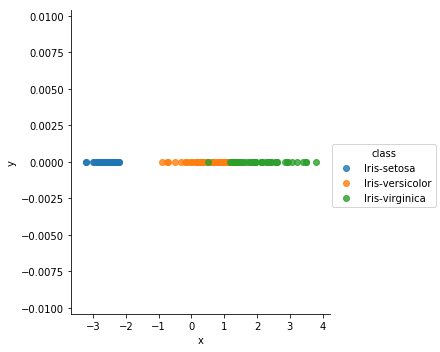

In [14]:
plt.figure(1, figsize=(10,10), dpi=100)
plt.clf()
sns.lmplot(data=dfpc, x="x", y="y", fit_reg=False, hue='class')

So, we see that one principal component explains 92% of the variance in the original dataset. The plot shows that one principal component distinguishes Setosa, but there's still overlap between Versicolor and Virginica.

### Two principal components

In [15]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_fit = pca.transform(X)

In [16]:
print('Total Variance explained by 1 principal components: %.2f%%' % ( sum(pca.explained_variance_ratio_) * 100))

Total Variance explained by 1 principal components: 97.76%


In [17]:
# Put principal components into a data frame so we can plot it.
dfpc = pd.DataFrame(X_fit, columns=['pc1', 'pc2'])
dfpc['class'] = y

<Figure size 1000x1000 with 0 Axes>

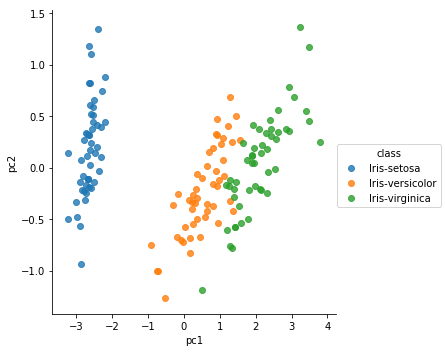

In [18]:
plt.figure(1, figsize=(10,10), dpi=100)
plt.clf()
sns.lmplot(data=dfpc, x="pc1", y="pc2", fit_reg=False, hue='class')
plt.show()